# Basic netcdf utilities
- NetCDD library functions: ncdump, 
- NetCDF operators (NCO, http://nco.sourceforge.net/ ): ncks, ncinfo, ncopy ..
- python interface to netcdf library

## NetCDF library
NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, 
access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. 
The Unidata Program Center supports and maintains netCDF programming interfaces for C, C++, Java, and Fortran. Programming interfaces 
are also available for Python, IDL, MATLAB, R, Ruby, and Perl.

example NetCDF Utilities: 
    The ncdump command reads a netCDF file and outputs text in a format called CDL. The ncgen command reads a text file in CDL format, and generates a netCDF data file. The nccopy command copies a netCDF file from one binary format to another, optionally changing compression and chunksize settings.

- ncdump: The utility ncdump can be used to show the contents of netCDF files. By default, ncdump shows the CDL description of the file. This CDL description can be fed into ncgen to create the data file.
- ncgen: The ncgen utility can take an ASCII input file, in CDL format, and generate a binary netCDF file. It is the opposite of ncdump.
- nccopy: The nccopy utility can copy a netCDF file, changing binary format, chunk sizes, compression, and other storage settings.

### ncdump

The NetCDF command `ncdump` is used to output a text representation of a NetCDF file's contents. More detailed information can be found from [Unidata website](http://www.unidata.ucar.edu/software/netcdf/netcdf-4/newdocs/ncdump-man-1.html).

In [1]:
!ncdump

/bin/bash: ncdump: command not found


**Basic Usage:**

```
ncdump <option> <file_path>/<url>
```
or 
```
ncdump <option> <url>
```

**View basic file header (or metadata) information**
The `-h` option (for 'header')

Use the `-h` option to view the netcdf file header information.

This will display
1. file dimensions
2. variables and variable metadata
3. global metadata. 

In [2]:
# Example: 
!ncdump -h /pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710//ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc

netcdf ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231 {
dimensions:
	time = UNLIMITED ; // (7305 currently)
	lev = 47 ;
	lat = 96 ;
	lon = 192 ;
	bnds = 2 ;
variables:
	double time(time) ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
	double time_bnds(time, bnds) ;
	double lev(lev) ;
		lev:bounds = "lev_bnds" ;
		lev:units = "1" ;
		lev:axis = "Z" ;
		lev:positive = "down" ;
		lev:long_name = "hybrid sigma pressure coordinate" ;
		lev:standard_name = "atmosphere_hybrid_sigma_pressure_coordinate" ;
		lev:formula = "p = ap + b*ps" ;
		lev:formula_terms = "ap: ap b: b ps: ps" ;
	double lev_bnds(lev, bnds) ;
		lev_bnds:formula = "p = ap + b*ps" ;
		lev_bnds:standard_name = "atmosphere_hybrid_sigma_pressure_coordinate" ;
		lev_bnds:units = "1" ;
		lev_bnds:formula_terms = "ap: ap_bnds b: b_bnds ps: ps" ;
	double ap(lev) ;


You can show variables using the `-v` option. For example:

In [4]:
!ncdump -v time /pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710//ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc | head -15

netcdf ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231 {
dimensions:
	time = UNLIMITED ; // (7305 currently)
	lev = 47 ;
	lat = 96 ;
	lon = 192 ;
	bnds = 2 ;
variables:
	double time(time) ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
		time:axis = "T" ;
		time:long_name = "time" ;
		time:standard_name = "time" ;


View special attributes such as chunking and compression information Use the combination  -hs

In [ ]:
!ncdump -hs /pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710//ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc

## Python interface to netcdf library (netcdf4-python)

In [5]:
!which ncinfo
!which nccopy

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/bin/ncinfo
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/bin/nccopy


In [ ]:
!ncinfo  /pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710//ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc

In [6]:
!nccopy -h

nccopy: option requires an argument -- 'h'
nccopy: nccopy [-k kind] [-[3|4|6|7]] [-d n] [-s] [-c chunkspec] [-u] [-w] [-[v|V] varlist] [-[g|G] grplist] [-m n] [-h n] [-e n] [-r] [-F filterspec] [-Ln] [-Mn] infile outfile
  [-k kind] specify kind of netCDF format for output file, default same as input
	    kind strings: 'classic', '64-bit offset', 'cdf5',
                          'netCDF-4', 'netCDF-4 classic model'
  [-3]      netCDF classic output (same as -k 'classic')
  [-6]      64-bit-offset output (same as -k '64-bit offset')
  [-4]      netCDF-4 output (same as -k 'netCDF-4')
  [-7]      netCDF-4-classic output (same as -k 'netCDF-4 classic model')
  [-5]      CDF5 output (same as -k 'cdf5)
  [-d n]    set output deflation compression level, default same as input (0=none 9=max)
  [-s]      add shuffle option to deflation compression
  [-c chunkspec] specify chunking for variable and dimensions, e.g. "var:N1,N2,..." or "dim1/N1,dim2/N2,..."
  [-u]      convert unlimited dimensio

In [7]:
# example CMIP6 file in DKRZ data pool
prefix = '/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710'
tfile = prefix+'/ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc'

In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
tfile = prefix+'/ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc'
print(tfile)
#open reference to the file and see overview of it
data = Dataset(tfile, "r");
print(data.variables.items())

/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710/ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc
dict_items([('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1 00:00:00
    calendar: proleptic_gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (7305,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (7305, 2)
filling on, default _FillValue of 9.969209968386869e+36 used), ('lev', <class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    bounds: lev_bnds
    units: 1
    axis: Z
    positive: down
    long_name: hybrid sigma pressure coordinate
    standard_name: atmosphere_hybrid_sigma_pressure_coordinate
    formula: p = ap + b*ps
    formula_terms: ap: ap b: b ps: ps
unlimi

# CDO examples

In [9]:
from cdo import Cdo
import glob

prefix = '/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710'
print(prefix)
tdir = prefix+'/ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc'
print(tdir)
cdo = Cdo()
cdo.sinfo(input=tdir)

/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710
/pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710/ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc


['File format : NetCDF4 classic zip',
 '-1 : Institut Source   T Steptype Levels Num    Points Num Dtype : Parameter ID',
 '1 : unknown  MPI-ESM1.2-LR v instant       1   1     18432   1  F32z : -1',
 '2 : unknown  MPI-ESM1.2-LR v instant      47   2     18432   1  F32z : -2',
 'Grid coordinates :',
 '1 : gaussian                 : points=18432 (192x96)  F48',
 'lon : 0 to 358.125 by 1.875 degrees_east  circular',
 'lat : -88.57217 to 88.57217 degrees_north',
 'available : cellbounds',
 'Vertical coordinates :',
 '1 : surface                  : levels=1',
 '2 : hybrid                   : levels=47',
 'lev : 0.99615 to 9.815866e-06 1',
 'bounds : 1-0.9923 to 1.963173e-05-0 1',
 'available : vct  ps: ps',
 'Time coordinate :',
 'time : 7305 steps',
 'RefTime =  1850-01-01 00:00:00  Units = days  Calendar = proleptic_gregorian  Bounds = true',
 'YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss  YYYY-MM-DD hh:mm:ss',
 '1850-01-01 12:00:00  1850-01-02 12:00:00  1850-01-03 12:00

In [10]:
# the above is the pythonic wrapper for:
!cdo sinfo /pool/data/CMIP6/data/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/CFday/ta/gn/v20190710//ta_CFday_MPI-ESM1-2-LR_piControl_r1i1p1f1_gn_18500101-18691231.nc

   File format : NetCDF4 classic zip
    -1 : Institut Source   T Steptype Levels Num    Points Num Dtype : Parameter ID
     1 : unknown  MPI-ESM1.2-LR v instant       1   1     18432   1  F32z : -1            
     2 : unknown  MPI-ESM1.2-LR v instant      47   2     18432   1  F32z : -2            
   Grid coordinates :
     1 : gaussian                 : points=18432 (192x96)  F48
                              lon : 0 to 358.125 by 1.875 degrees_east  circular
                              lat : -88.57217 to 88.57217 degrees_north
                        available : cellbounds
   Vertical coordinates :
     1 : surface                  : levels=1
     2 : hybrid                   : levels=47
                              lev : 0.99615 to 9.815866e-06 1
                           bounds : 1-0.9923 to 1.963173e-05-0 1
                        available : vct  ps: ps
   Time coordinate :
                             time : 7305 steps
     RefTime =  1850-01-01 00:00:00  Units = days  C

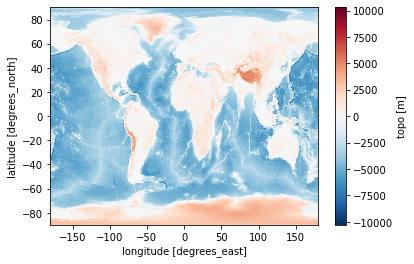

In [11]:
cdo.topo(returnXArray='topo').plot()

### What is NCO?

The netCDF Operators (NCO) comprise about a dozen standalone, command line programs that take netCDF, HDF files, or DAP services as input, then operate (e.g., derive new fields, compute statistics, print, hyperslab, manipulate metadata, regrid) and output the results to screen or files in text, binary, or netCDF formats. NCO aids analysis of gridded and unstructured scientific data. The Unix shell commands of NCO allows users to manipulate and analyze files interactively, or with expressive scripts that avoid some overhead of higher-level programming environments.

on DKRZ use "module load nco" to use nco 
attention: nco is not part of the default python juypterhub kernel
see http://nco.sourceforge.net/nco.html for a detailed user guide.

**ncks** is netCDF kitchen sink operator. Similar to ncdump, this command can give an overview of a netCDF file, extract certain variables, extract certain dimensions and manipulate record dimensions. 

You can view the contents of a netCDF file from either a local file or a remote data service link. 
```
$ ncks <file> | more
$ ncks <url> | more

$ ncks http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/\
Amon/r1i1p1/v20130325/tasmax/tasmax_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc | more
```

See more [ncks examples](http://nco.sourceforge.net/nco.html#xmp_ncks) here.

Other operators include:
- __ncap2__: netCDF Arithmetic Processor
- __ncatted__: netCDF Attribute Editor
- __ncbo__: netCDF Binary Operator
- __nces__: netCDF Ensemble Statistics
- __ncflint__: netCDF File Interpolator
- __ncra__: netCDF Record Averager
- __ncwaa__: netCDF Weighted Averager

Try these operators out on your netCDF files! For help on a particular operator, type <span style="color:red"> man operator </span> (e.g. man ncbo)